#Paquetes necesarios

In [66]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

Carga imagen y convierte a RGB

(938, 473, 3)


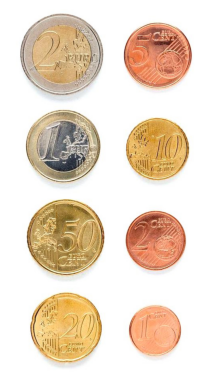

In [2]:
#Carga imagen ejemplo con monedas
img = cv2.imread('Monedas.jpg') 
print(img.shape)
#Recordando que OpenCV lee las imágenes en BGR, por lo que convertimos para visualizr RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.axis("off")
plt.imshow(img_rgb) 
plt.show()

Convierte a gris y muestra histograma

(0.0, 256.0)

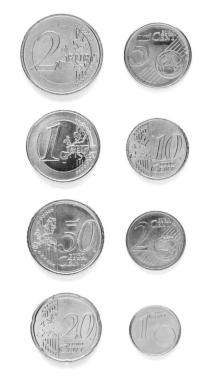

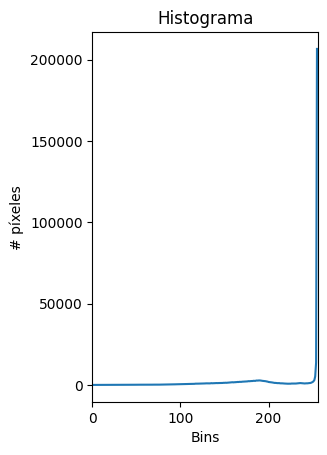

In [3]:
#Convierte la imagen a todos de gris, mostrando el resultado
img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Cálculo del histograma con 256 bins de una imagen en escala de grises
hist = cv2.calcHist([img_gris], [0], None, [256], [0, 256])

plt.figure()
plt.axis("off")
plt.imshow(img_gris, cmap='gray')

# Histograma sin normalizar
plt.figure()
plt.subplot(1, 2, 1)
plt.title("Histograma")
plt.xlabel("Bins")
plt.ylabel("# píxeles")
plt.plot(hist)
plt.xlim([0, 256])

Cuenta elementos tras umbralizar

Text(0.5, 1.0, 'OTSU invertida')

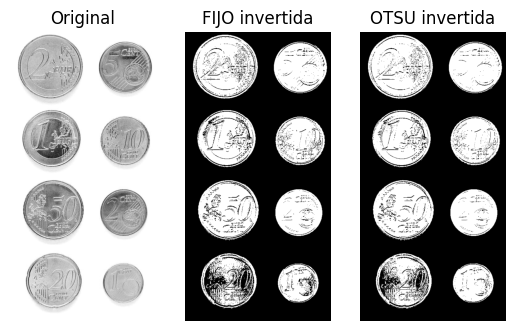

In [4]:
#Dos umbralizados. Te invito a probar con parámetros, aplicar filtro previo, etc.
umbral = 200
# Umbralizado binaria invertido, dado que por defecto se asume objetos en blanco
res,img_th1 = cv2.threshold(img_gris,umbral,255,cv2.THRESH_BINARY_INV)
# Umbralizado con método de Otsu
ret2,img_th2 = cv2.threshold(img_gris,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

plt.subplot(1, 3, 1)
plt.axis("off")
plt.imshow(img_gris,cmap='gray') 
plt.title('Original')

plt.subplot(1, 3, 2)
plt.axis("off")
plt.imshow(img_th1,cmap='gray') 
plt.title('FIJO invertida')

plt.subplot(1, 3, 3)
plt.axis("off")
plt.imshow(img_th2,cmap='gray') 
plt.title('OTSU invertida')



Búsqueda de componentes y sus contornos

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


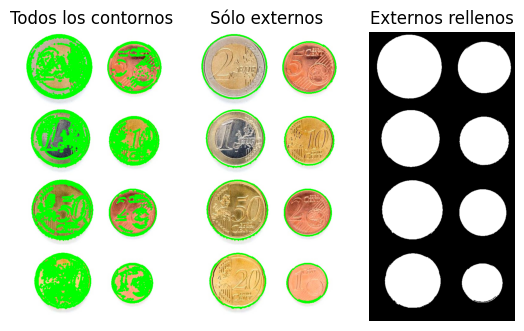

In [5]:
#Localiza contornos en imagen obtenida con umbral fijo
#findContours está diseñada para imágenes con la figura en blanco y el fondo negro
#La imagen de entrada debe ser de un canal y 8 bits excepto en los modos RETR_CCOMP o RETR_FLOODFILL
#hierarchy contiene información sobre el nivel del contorno, relaciones paterno-filiales

#Obtiene todos los contornos, externos e internos
contornos, hierarchy = cv2.findContours(
    img_th1, #imagen
    cv2.RETR_TREE, #Modo de recuperación (lista, árbol, nivel superior)
    cv2.CHAIN_APPROX_SIMPLE #Método de aproximación del contorno
    )
#Obtiene únicamente los contornos externos
contornos2, hierarchy2 = cv2.findContours(img_th1, 
    cv2.RETR_EXTERNAL , 
    cv2.CHAIN_APPROX_SIMPLE)

# Dibuja sobre la imagen de entrada todos los contornos en verde
#Cada vez que quiere pintar convierte img para no tener restos
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.drawContours(img_rgb, contornos, -1, (0,255,0), 3)

plt.subplot(131)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('Todos los contornos')

# Dibuja sobre la imagen de entrada sólo contornos externos
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.drawContours(img_rgb, contornos2, -1, (0,255,0), 3)

plt.subplot(132)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('Sólo externos')

#Dibuja contornos externos rellenos en imagen vacía
#crea imagen vacíanegra
img_cont = np.zeros(img_rgb.shape)
for c in contornos2:
    #Área delcontorno
    area = cv2.contourArea(c)

    #Dimensión mínima (útil en ocasiones)
    if area > 10:
        #Perímetro delcontorno
        perimetro = cv2.arcLength(c,True)
        #Contenedor alineado con ejes de la imagen
        x,y,w,h = cv2.boundingRect(c)
        #Mínimo contenedor ajustado para el contorno
        rect = cv2.minAreaRect(c)
        #Mínimo círculo que lo contiene
        (cx,cy),radio = cv2.minEnclosingCircle(c)
        #Elipse ajustada al contorno
        if c.shape[0] > 5:
            elipse = cv2.fitEllipse(c)
            #Para determinadas tareas nos interesará mostrar estos valores
            #print(area, perimetro, rect, cx,cy,radio, elipse)

        #Dibuja los contornos
        cv2.drawContours(img_cont, [c], -1, (255,255,255), -1)

plt.subplot(133)
plt.axis("off")
plt.imshow(img_cont) 
plt.title('Externos rellenos')
plt.show()


TAREA 1: Captura una o varias imágenes con monedas no solapadas y algún objeto que no lo sea. Filtra los contornos que no se correpondan con monedas, y muestra el número total de monedas presentes en la imagen.

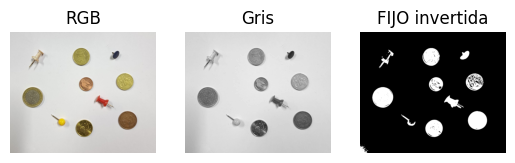

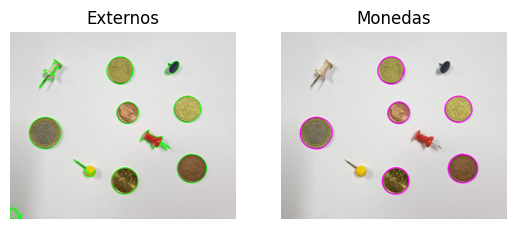

In [6]:
# cargamos la imagen y la mostramos
img = cv2.imread('coins-with-random.jpeg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# convertimos la imagen a escala de grises
img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# umbralizado de la imagen
threshold = 172
ret2, img_th = cv2.threshold(img_gris, threshold, 255, cv2.THRESH_BINARY_INV)

plt.subplot(1, 3, 1)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('RGB')

plt.subplot(1, 3, 2)
plt.axis("off")
plt.imshow(img_gris, cmap='gray') 
plt.title('Gris')

plt.subplot(1, 3, 3)
plt.axis("off")
plt.imshow(img_th, cmap='gray') 
plt.title('FIJO invertida')
plt.show()

# obtención de contornos externos
contours, hierarchy = cv2.findContours(img_th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
img_rgb_contours_ext = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.drawContours(img_rgb_contours_ext, contours, -1, (0,255,0), 3)

# obtención de contornos circulares
circular_contours = []
for contour in contours:
    # calculamos el valor de epsilon a partir del perimetro para aproximar la forma del contorno
    epsilon = 0.02*cv2.arcLength(contour, True)
    # aproximamos las formas
    approx = cv2.approxPolyDP(contour, epsilon, True)

    # area
    area = cv2.contourArea(contour)

    if len(approx) == 8 and area > 10:
        circular_contours.append(contour)

img_rgb_circles = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.drawContours(img_rgb_circles, circular_contours, -1, (255,0,255), 5)

plt.subplot(1, 2, 1)
plt.axis("off")
plt.imshow(img_rgb_contours_ext) 
plt.title('Externos')

plt.subplot(1, 2, 2)
plt.axis('off')
plt.imshow(img_rgb_circles)
plt.title('Monedas')

plt.show()

Una alternativa consiste en contar círculos utilizando la Transformada de Hough. La selección de parámetros puede ser "divertida", más [información](https://docs.opencv.org/4.x/da/d53/tutorial_py_houghcircles.html)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


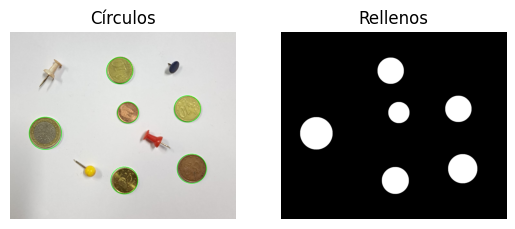

In [7]:
#Conversión a gris
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#Suaviza altas frecuencias
pimg = cv2.medianBlur(gris, 7)
#Localiza Círculos
circ = cv2.HoughCircles(
        pimg,  # imagen 
        cv2.HOUGH_GRADIENT,  # tipo de detección
        1,
        100,  # distancia mínima entre círculos
        param1=100, # Valor del gradiente
        param2=50, #Umbral acumulador
        minRadius=50,  # radio mínimo
        maxRadius=150,  # radio máximo
    )

#Dibuja sobre entrada  e imagen vacía
img_cont = np.zeros(img_rgb.shape)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
for det in circ[0]:
        x_coor, y_coor, det_radio = det
        cv2.circle(img_rgb,(int(x_coor), int(y_coor)),
            int(det_radio),(0, 255, 0), 2)
        cv2.circle(img_cont,(int(x_coor), int(y_coor)),
            int(det_radio),(255, 255, 255), -1)

#Muestra resultado
plt.subplot(121)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('Círculos')

plt.subplot(122)
plt.axis("off")
plt.imshow(img_cont) 
plt.title('Rellenos')

plt.show()

TAREA 2: Captura una o varias imágenes con monedas no solapadas, y otras con monedas solapadas. Identificada una moneda de un euro en la imagen, por ejemplo con un clic de ratón, calcular la cantidad de dinero presente en la imagen. ¿Qué problemas han observado?




INTERFACES USED IN THE CODE

In [8]:
class MoneyLabeler:
    def label():
        pass

class MoneyExtractor:
    def extract():
        pass

class MoneyPrinter:
    def print():
        pass

class CoinPicker:
    def pick(x, y):
        pass

INTERFACES IMPLEMENTATION

In [105]:
class HoughCirclesMoneyExtractor(MoneyExtractor):
    def __init__(self, img):
        self.img = img

    def extract(self):
        gris = cv2.cvtColor(self.img, cv2.COLOR_BGR2GRAY)
        #Suaviza altas frecuencias
        pimg = cv2.medianBlur(gris, 7)
        #Localiza Círculos
        circ = cv2.HoughCircles(
                pimg,  # imagen 
                cv2.HOUGH_GRADIENT,  # tipo de detección
                1,
                100,  # distancia mínima entre círculos
                param1=100, # Valor del gradiente
                param2=50, #Umbral acumulador
                minRadius=50,  # radio mínimo
                maxRadius=300,  # radio máximo
            )

        # img_rgb = cv2.cvtColor(self.img, cv2.COLOR_BGR2RGB)
        # img_cont = np.zeros(img_rgb.shape)

        money_list = []

        for det in circ[0]:
            x_coor, y_coor, det_radio = det
            money_list.append({
                "x" : x_coor,
                "y" : y_coor, 
                "radio": det_radio
            })

        return money_list
    
class Cv2MoneyPrinter(MoneyPrinter):
    def __init__(self, img):
        self.img = img
    
    def print(self, money_list):
        for m in money_list:
            x_coor = m["x"]
            y_coor = m["y"]
            det_radio = m["radio"]
            cv2.circle(self.img,(int(x_coor), int(y_coor)),
                int(det_radio),(0, 255, 0), 2)

class LabelMoneyPrinter(MoneyPrinter):
    def __init__(self, img):
        self.img = img
    
    def print(self, money_list):
        for m in money_list:
            x_coor = m["x"]
            y_coor = m["y"]
            cv2.putText(self.img, m["label"], (int(x_coor), int(y_coor)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    
class Cv2CoinPicker(CoinPicker):
    def __init__(self, money):
        self.money = money
        self.picked = None

    def pick(self, x, y):
        for m in self.money:
            if (x - m["x"])**2 + (y - m["y"])**2 <= m["radio"]**2:
                self.picked = m 
    
    def get_picked(self):
        return self.picked

class RadiusComparedMoneyLabeler(MoneyLabeler):
    coin_diameters = {
        "one_cent":  16.25,
        "two_cents": 18.75,
        "five_cents": 21.25,
        "ten_cents": 19.75,
        "twenty_cents": 22.25,
        "fifty_cents": 24.25,
        "one_eur": 23.25,
        "two_eur": 	25.75
    }

    def __init__(self, money) -> None:
        self.money = money
    
    def compare_scaled_radious(self, one_eur_radious):
        for x in self.money:
            x["label"] = None
            x["radio"] = x["radio"] / one_eur_radious * self.coin_diameters['one_eur']

            for tolerance in np.arange(0.0, 3.0, 0.001):
                for k, v in self.coin_diameters.items():
                    if abs(x["radio"] - v) < tolerance:
                        x["label"] = k
                        break
                if x["label"] != None:
                    break

                
        return self.money

    def label(self, one_eur_radious):
        return self.compare_scaled_radious(one_eur_radious)

In [121]:

class MoneyDetector:
    def __init__(self, url):
        self.url = url
    

    def run(self):
        def create_callback(fun):
            def mouse_callback(event, x, y, flags, param):
                if event == cv2.EVENT_LBUTTONDOWN:
                    fun(x, y)
            return mouse_callback

        cv2.namedWindow('Image')

        img = cv2.imread(self.url) 
        img_rgb = img

        money = HoughCirclesMoneyExtractor(img=img_rgb).extract()
        picker = Cv2CoinPicker(money)
        Cv2MoneyPrinter(img_rgb).print(money)

        while(True):      
            cv2.setMouseCallback('Image', create_callback(picker.pick))

            if picker.get_picked() is not None:
                labels = RadiusComparedMoneyLabeler(money).label(picker.get_picked()["radio"])
                LabelMoneyPrinter(img_rgb).print(labels)


            cv2.imshow('Image', img_rgb)
            
            # Detenemos pulsado ESC
            if cv2.waitKey(20) == 27:
                break
        
        # Destruye ventanas
        cv2.destroyAllWindows()
    


In [123]:
app = MoneyDetector('./coins-with-random.jpeg')
app.run()

app = MoneyDetector('./coins-with-random-2.jpeg')
app.run()

app = MoneyDetector('./Monedas.jpg')
app.run()

KeyboardInterrupt: 

Clasificación de microplásticos

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


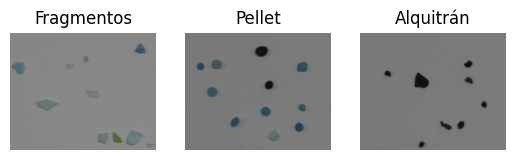

In [8]:
#Cargamos tres subimágenes de cada uno de los tres tipos considerados (el alquitrán efectivamenet no es microplástico)
imgF = cv2.imread('FRA.png') 
imgP = cv2.imread('PEL.png') 
imgT = cv2.imread('TAR.png') 

#Mostramos
plt.subplot(131)
plt.axis("off")
plt.imshow(imgF) 
plt.title('Fragmentos')
plt.subplot(132)
plt.axis("off")
plt.imshow(imgP) 
plt.title('Pellet')
plt.subplot(133)
plt.axis("off")
plt.imshow(imgT) 
plt.title('Alquitrán')
plt.show()

TAREA 3: Estas tres imágenes han sido extraidas de las imágenes de mayor tamaño contenidas en la carpeta. Determina patrones geométricos para cada una de las tres clases y evalúa los aciertos y fallos con las imágenes completas la matriz de confusión. Para cada clase, determina el número de muestras que se clasifican correctamente de dicha clase, y el número de muestras que se clasifica incorrectamente por cada una de las otras dos clases.

El el trabajo [SMACC: A System for Microplastics Automatic Counting and Classification](https://doi.org/10.1109/ACCESS.2020.2970498), las características geométricas utilizadas en dicho trabajo fueron:

- Área en píxeles
- Perímetro en píxeles
- Compacidad (relación del cuadrado del perímetro con el área)
- Relación del área con la del contenedor
- Relación del ancho y el alto del contenedor
- Relación entre los ejes de la elipse ajustada
- Definido el centroide, relación entre las distancias menor y mayor al contorno

Si no se quedan satisfechos con la segmentación obtenida, es el mundo real, también en el README comento técnicas recientes de segmentación, que podrían despertar su curiosidad.

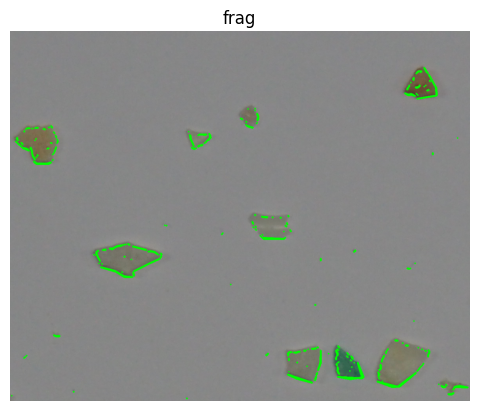

In [116]:
# cargamos las imágenes y las pasamos a rgb
imgMP = cv2.imread('FRA.png') 
# imgMP = cv2.imread('PEL.png') 
# imgMP = cv2.imread('TAR.png') 

# convertimos las imágenes a escala de grises
imgMP_gray = cv2.cvtColor(imgMP, cv2.COLOR_BGR2GRAY)

# aplicamos umbralizado
imgMP_th = cv2.adaptiveThreshold(imgMP_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# aplicamos filtro gaussiano
imgMP_blur = cv2.GaussianBlur(imgMP_th, (9, 9), 0)

# aplicamos filtro de blur
imgMP_blur = cv2.medianBlur(imgMP_blur, 5)

# aplicamos sobel
x = cv2.Sobel(imgMP_blur, cv2.CV_64F, 1, 0)  # x
y = cv2.Sobel(imgMP_blur, cv2.CV_64F, 0, 1)  # y
_, x = cv2.threshold(x, 240, 255, cv2.THRESH_BINARY)
_, y = cv2.threshold(y, 240, 255, cv2.THRESH_BINARY)

# juntamos el resultado de sobel
result = np.clip(np.add(x, y), 0, 255)
result = result.astype(np.uint8)

# erosionamos y dilatamos
result = cv2.erode(result, kernel=np.ones((2, 2), np.uint8), iterations=1)
# result = cv2.dilate(result, kernel=np.ones((2, 2), np.uint8), iterations=1)

# obtención de contornos externos
contours, _ = cv2.findContours(result, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
imgMP_c = cv2.cvtColor(imgMP, cv2.COLOR_BGR2RGB)

approx_contours = []
for contour in contours:
    # calculamos el valor de epsilon a partir del perimetro para aproximar la forma del contorno
    epsilon = 0.02*cv2.arcLength(contour, True)
    # aproximamos las formas
    approx = cv2.approxPolyDP(contour, epsilon, True)

    # area
    area = cv2.contourArea(contour)

    approx_contours.append(approx)

# dibujamos contornos obtenidos en la imagen en rgb
cv2.drawContours(imgMP_c, approx_contours, -1, (0,255,0), 3)

plt.axis("off")
plt.imshow(imgMP_c) 
plt.title('frag')
plt.show()

Las métricas se utilizan para mostrar la bondad de un clasificador, la siguiente celda obtiene varias para un conjunto de datos imaginario (y con etiquetas aleatorias). Si bien las trataremos con más detalle en teoría, muestro un repertorio de ellas, dando más peso a la matriz de confusión.

¿Qué es una matriz de confusión?
Se utiliza para mostrar el comportamiento de un clasificador par alas distintas clases consideradas, se relacionan las etiquetas de las muestras anotadas frente a las predichas por el clasificador. Se busca una matriz diagonal, pero la perfección es infrecuente

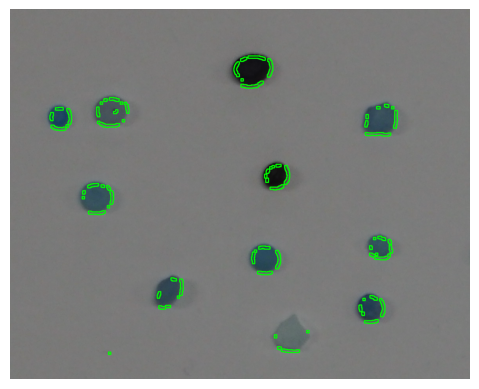

"\n# Convierte la imagen a escala de grises\ngray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)\n\n# Aplica un desenfoque para reducir el ruido\nblurred = cv2.GaussianBlur(gray, (5, 5), 0)\n\n# Realiza la detección de bordes usando Canny\n\n# Encuentra los contornos en la imagen\n\n# Muestra la imagen con los contornos\ncv2.imshow('Contornos', edges)\ncv2.waitKey(0)\ncv2.destroyAllWindows()\n"

In [76]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('PEL.png')

# Convert the image from BGR to RGB (OpenCV loads images as BGR)
image_gray= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Apply adaptive thresholding
thresholded = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
blurred = cv2.GaussianBlur(thresholded, (9, 9), 0)
blurred = cv2.medianBlur(blurred, 5)

x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0)  # x
_, x = cv2.threshold(x, 240, 255, cv2.THRESH_BINARY)
y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1)  # x
_, y = cv2.threshold(y, 240, 255, cv2.THRESH_BINARY)

result = np.clip(np.add(x, y), 0, 255)
result = result.astype(np.uint8)
# Define the kernel size for morphological operations
kernel_size = (2, 2)  # Adjust the kernel size as needed
result = cv2.erode(result, kernel=np.ones(kernel_size, np.uint8), iterations=1)
# Perform dilation to restore the original shape of larger structures
result = cv2.dilate(result, kernel=np.ones(kernel_size, np.uint8), iterations=1)
# Define the kernel size for morphological operations
kernel_size = (3, 3)  # Adjust the kernel size based on the size of isolated points to remove

# Perform morphological opening
result = cv2.morphologyEx(result, cv2.MORPH_OPEN, np.ones(kernel_size, np.uint8))
result = cv2.GaussianBlur(result, (5, 5), 0)
blurred = cv2.medianBlur(result, 5)

contours, _ = cv2.findContours(result, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Dibuja los contornos en la imagen original
cv2.drawContours(image, contours, -1, (0, 255, 0), 2)
# Display the image using Matplotlib

plt.imshow(image, cmap='gray')
plt.axis('off')  # Hide axis labels
plt.show()

"""
# Convierte la imagen a escala de grises
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Aplica un desenfoque para reducir el ruido
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Realiza la detección de bordes usando Canny

# Encuentra los contornos en la imagen

# Muestra la imagen con los contornos
cv2.imshow('Contornos', edges)
cv2.waitKey(0)
cv2.destroyAllWindows()
"""


In [13]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

class ConfusionMatrix:
    def __init__(self, y, y_pred, nclases = 3):
        self.y = y
        self.y_pred = y_pred
        self.nclases = nclases

    def print_metrics(self):
        accuracy = accuracy_score(self.y, self.y_pred)
        precision = precision_score(self.y, self.y_pred,average='weighted')
        recall = recall_score(self.y, self.y_pred,average='weighted')
        f1score = f1_score(self.y, self.y_pred,average='weighted')
        print(f"Accuracy (TP/(n))= {accuracy}")
        print(f"Precision (TP/(TP+FP)) = {precision}")
        print(f"Recall (TP/(TP+FN)) = {recall}")
        print(f"F1 Score (2*(precision*recall)/(precision+recall)) = {f1score}")

    def print_confusion(self):
        conf_matrix = confusion_matrix(self.y, self.y_pred)
        plt.figure(figsize=(8,8))
        sns.set(font_scale = 1.75)#tamaños tipografía
        sns.set(font_scale = 3.0)

        ax = sns.heatmap(
                conf_matrix, # confusion matrix 2D array 
                annot=True, # Muestra números en las celdas
                fmt='d', # valores enteros
                cbar=False, # sin barra de colores
                cmap='flag', # mapa de colores
                #vmax=175 # contraste de color
            )
        label_font = {'size':'25'}
        ax.set_xlabel("Predicha", labelpad=-0.75, fontdict=label_font)
        ax.set_ylabel("Anotada", labelpad=20, fontdict=label_font)

    def show(self):
        self.print_metrics()
        self.print_confusion()


Accuracy (TP/(n))= 0.25
Precision (TP/(TP+FP)) = 0.2446190476190476
Recall (TP/(TP+FN)) = 0.25
F1 Score (2*(precision*recall)/(precision+recall)) = 0.241969351439662


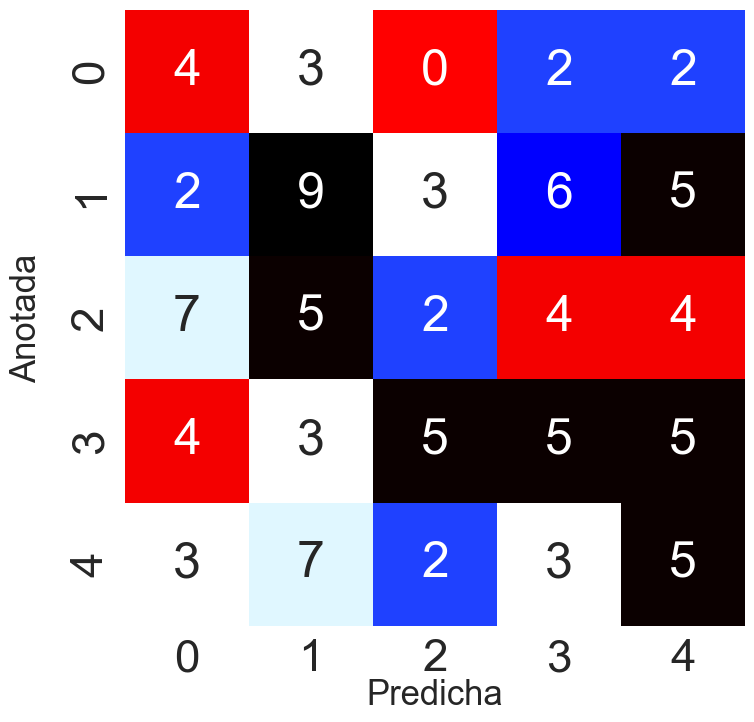

In [14]:

import random
n = 100  
nclases =5

# A falta de clasificador y conjunto de datos, creamos anotaciones y predicciones de forma aleatoria
# Vector aleatorio con etiquetas anotadas
y = [random.randint(0, nclases - 1) for _ in range(n)]

# Vector aleatorio con etiquetas predichas por un supuesto clasificador
y_pred = [random.randint(0, nclases - 1) for _ in range(n)]

confusion = ConfusionMatrix(y, y_pred, nclases)
confusion.show()
